In [1]:
import meep as mp

Using MPI version 4.0, 1 processes


In [2]:
n = 3.4                 # index of waveguide
w = 1                   # width of waveguide
r = 1                   # inner radius of ring
pad = 4                 # padding between waveguide and edge of PML
dpml = 2                # thickness of PML
sxy = 2*(r+w+pad+dpml)  # cell size

In [3]:
c1 = mp.Cylinder(radius=r+w, material=mp.Medium(index=n))
c2 = mp.Cylinder(radius=r)

In [4]:
fcen = 0.15              # pulse center frequency
df = 0.1                 # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(r+0.1))

In [5]:
sim = mp.Simulation(cell_size=mp.Vector3(sxy, sxy),
                    geometry=[c1, c2],
                    sources=[src],
                    resolution=10,
                    boundary_layers=[mp.PML(dpml)])

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(r+0.1), fcen, df)),
        until_after_sources=300)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000190973 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0907779 s
-----------
creating output file "./eps-000000.00.h5"...
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.11810170391245349, -0.0007320811089483333, 80.66162510470444, 0.0034145272680254093, -0.003050614035354522-0.0015338678141831724i, 1.0205541192901731e-05+0.0i
harminv0:, 0.14716287260570637, -0.00023255783501138747, 316.40059041334894, 0.028643628297379344, 0.01930499473292779-0.02116068572613045i, 7.295828826460173e-07+0.0i
harminv0:, 0.17524676118305868, -5.221379414996628e-05,

     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<AxesSubplot:xlabel='X', ylabel='Y'>

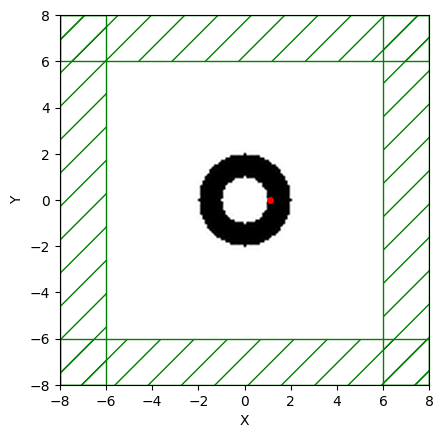

In [6]:
sim.plot2D()